<a href="https://colab.research.google.com/github/jatinmeenia/CocaCola-Stock-Prediction/blob/main/coffee_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

data = {
    "date": [
        "2015-01-02","2015-01-03","2015-01-04","2015-01-05","2015-01-06",
        "2015-01-07","2015-01-08","2015-01-09","2015-01-10","2015-01-11"
    ],
    "coffee_name": [
        "Latte","Espresso","Cappuccino","Latte","Americano",
        "Latte","Mocha","Espresso","Cappuccino","Latte"
    ],
    "money": [120, 80, 100, 130, 90, 150, 110, 85, 105, 140],
    "hour": [9, 10, 11, 9, 12, 10, 11, 9, 12, 10]
}

df = pd.DataFrame(data)

df.to_csv("coffee_sales.csv", index=False)

df.head()


,date,coffee_name,money,hour
0,2015-01-02,Latte,120,9
1,2015-01-03,Espresso,80,10
2,2015-01-04,Cappuccino,100,11
3,2015-01-05,Latte,130,9
4,2015-01-06,Americano,90,12


In [5]:
data = pd.read_csv("coffee_sales.csv")
data


,date,coffee_name,money,hour
0,2015-01-02,Latte,120,9
1,2015-01-03,Espresso,80,10
2,2015-01-04,Cappuccino,100,11
3,2015-01-05,Latte,130,9
4,2015-01-06,Americano,90,12
5,2015-01-07,Latte,150,10
6,2015-01-08,Mocha,110,11
7,2015-01-09,Espresso,85,9
8,2015-01-10,Cappuccino,105,12
9,2015-01-11,Latte,140,10


In [6]:
data['date'] = pd.to_datetime(data['date'])


In [7]:
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day_name()


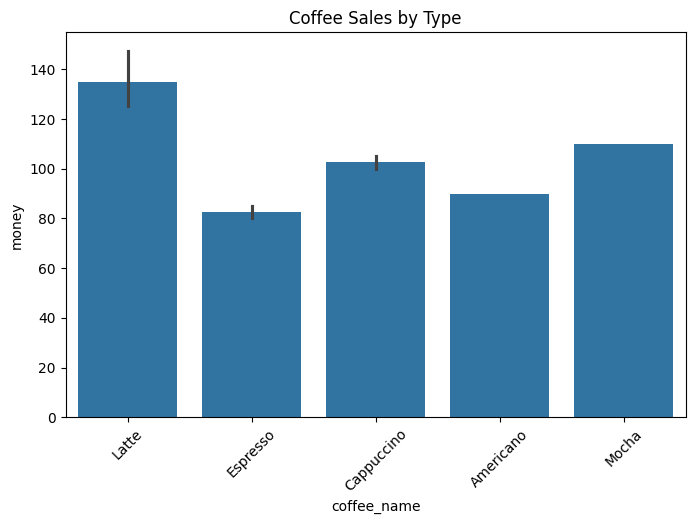

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x='coffee_name', y='money', data=data)
plt.title("Coffee Sales by Type")
plt.xticks(rotation=45)
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X = data[['hour']]
y = data['money']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)

print("Mean Absolute Error:", mae)


Mean Absolute Error: 19.330985915492953


In [13]:
future_hour = [[10]]  # 10 AM
future_sale = model.predict(future_hour)

print("Predicted Sale at 10 AM:", future_sale[0])


Predicted Sale at 10 AM: 116.47887323943662


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
import pandas as pd

future_hours = pd.DataFrame({
    'hour': [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
})

future_predictions = model.predict(future_hours)

result = pd.DataFrame({
    "Hour": future_hours['hour'],
    "Predicted_Sales": future_predictions
})

result


,Hour,Predicted_Sales
0,9,123.309859
1,10,116.478873
2,11,109.647887
3,12,102.816901
4,13,95.985915
5,14,89.154930
6,15,82.323944
7,16,75.492958
8,17,68.661972
9,18,61.830986


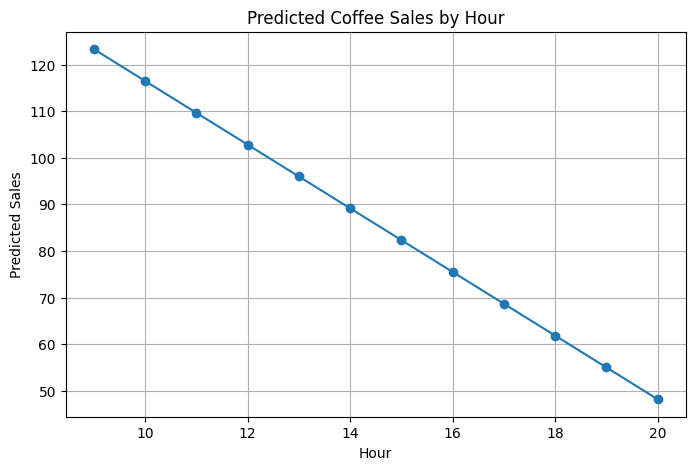

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(result['Hour'], result['Predicted_Sales'], marker='o')
plt.title("Predicted Coffee Sales by Hour")
plt.xlabel("Hour")
plt.ylabel("Predicted Sales")
plt.grid()
plt.show()
